In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline
from matplotlib.lines import Line2D

from auditory_cortex import utils
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter


INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


(-0.5, 2.0)

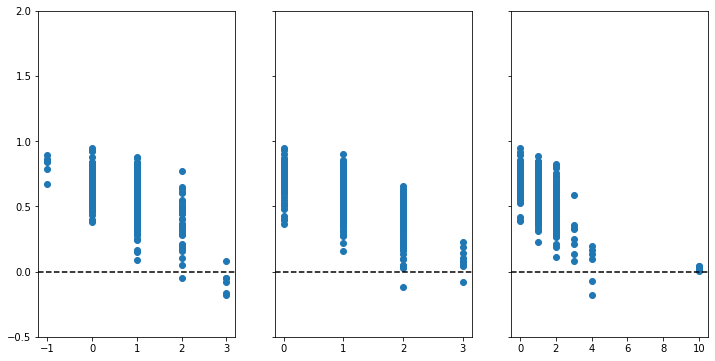

In [7]:
model_name = 'whisper_tiny'
threshold = 0.5
mVocs = False
lmbda_column = 'opt_lmbda'
corr_column = 'normalized_test_cc'
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
i = 0
identifier = 'ucsf_timit_trf_lags50_bw50_plos_review_middle_layers'
strf_obj = Correlations(model_name + '_' + identifier)
data = strf_obj.get_highly_tuned_channels(strf_obj.data, threshold=threshold, mVocs=mVocs)
axes[i].scatter(data[lmbda_column], data[corr_column])
axes[i].axhline(0, color='black', linestyle='--')
axes[i].set_ylim(-0.5, 2)
# axes[i].hist(strf_obj.data['lmbda'])
# axes[i].set_xlim(-5, 10)

i=1
identifier = 'ucsf_timit_trf_lags300_bw50_plos_review_middle_layers'
strf_obj = Correlations(model_name + '_' + identifier)
data = strf_obj.get_highly_tuned_channels(strf_obj.data, threshold=threshold, mVocs=mVocs)
axes[i].scatter(data[lmbda_column], data[corr_column])
axes[i].axhline(0, color='black', linestyle='--')
axes[i].set_ylim(-0.5, 2)
# axes[i].hist(strf_obj.data['lmbda'])
# axes[i].set_xlim(-5, 10)

i=2
identifier = 'ucsf_timit_trf_lags300_bw50_regression_improved_middle_layers'
strf_obj = Correlations(model_name + '_' + identifier)
data = strf_obj.get_highly_tuned_channels(strf_obj.data, threshold=threshold, mVocs=mVocs)
axes[i].scatter(data[lmbda_column], data[corr_column])
axes[i].axhline(0, color='black', linestyle='--')
axes[i].set_ylim(-0.5, 2)
# axes[i].hist(strf_obj.data['lmbda'])
# axes[i].set_xlim(-5, 10)

### middle layers

In [2]:
threshold = 0.5
area = 'all'
bin_width = 50
normalized = True

In [5]:
identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved'
model_name = 'whisper_tiny'

mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
all_layer_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )

# identifier = 'ucsf_timit_trf_lags300_bw50_plos_review_middle_layers'
# identifier = 'ucsf_timit_trf_lags50_bw50_plos_review_middle_layers'
# identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved_middle_layers'
identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved_all_layers'
# identifier = 'ucsf_timit_trf_lags300_bw50_regression_improved_all_layers'
model_name = 'whisper_tiny'

mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
all_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )
combined_dist = all_dists[0]

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


INFO:Peak corr (median): 0.5924593921399006, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9298824673090876, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.5963481281728162, occurs at x_coordinate: 0


INFO:Peak corr (max): 0.9283325901424864, occurs at x_coordinate: 0


(0.0, 1.0)

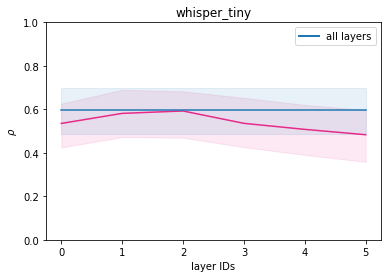

In [6]:
ax = None
alpha = 0.1
legends = []
display_inter_quartile_range = True
color = PlotterUtils.get_model_specific_color(model_name)
ax=RegPlotter.plot_line_with_shaded_region(
        data_dict=all_layer_dists, color=color, alpha=alpha, ax=ax,
        display_inter_quartile_range=display_inter_quartile_range,
        display_dotted_lines=False,
        )
baseline_color = 'tab:blue'
middle_dist_all_layers = {key: combined_dist for key in all_layer_dists.keys()}
RegPlotter.plot_line_with_shaded_region(
    data_dict=middle_dist_all_layers,
    color=baseline_color, alpha=alpha, ax = ax,
    display_dotted_lines=False,
    display_inter_quartile_range=display_inter_quartile_range,
    # median_ls='--'
    )
legends.append(
    Line2D([0], [0], color=baseline_color, lw=2, label='all layers'),
)


plt.ylabel(f"$\\rho$")
plt.title(f"{model_name}")
plt.xlabel(f"layer IDs")
# plt.axhline(0.4167, color='black', lw=1, ls='--')
plt.legend(handles=legends)
ax.set_ylim(0.0, 1.0)

In [14]:
threshold = 0.5
area = 'all'
bin_width = 50
normalized = True

identifier = 'timit_trf_lags300_bw50_naplib_matched'
model_name = 'whisper_tiny'

mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
all_layer_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )

identifier = 'ucsf_timit_trf_lags300_bw50_plos_review_middle_layers'
# identifier = 'ucsf_timit_trf_lags50_bw50_plos_review_middle_layers'
# identifier = 'ucsf_timit_trf_lags300_bw50_regression_improved_middle_layers'
model_name = 'whisper_tiny'

mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
all_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )
combined_dist = all_dists[0]

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


INFO:Peak corr (median): 0.5793349635051107, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.3296977999683492, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.551791627138073, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.9500869796747116, occurs at x_coordinate: 0


(0.0, 1.0)

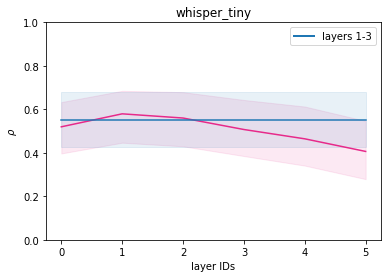

In [ ]:
ax = None
alpha = 0.1
legends = []
display_inter_quartile_range = True
color = PlotterUtils.get_model_specific_color(model_name)
ax=RegPlotter.plot_line_with_shaded_region(
        data_dict=all_layer_dists, color=color, alpha=alpha, ax=ax,
        display_inter_quartile_range=display_inter_quartile_range,
        display_dotted_lines=False,
        )
baseline_color = 'tab:blue'
middle_dist_all_layers = {key: combined_dist for key in all_layer_dists.keys()}
RegPlotter.plot_line_with_shaded_region(
    data_dict=middle_dist_all_layers,
    color=baseline_color, alpha=alpha, ax = ax,
    display_dotted_lines=False,
    display_inter_quartile_range=display_inter_quartile_range,
    # median_ls='--'
    )
legends.append(
    Line2D([0], [0], color=baseline_color, lw=2, label='layers 1-3'),
)

plt.ylabel(f"$\\rho$")
plt.title(f"{model_name}")
plt.xlabel(f"layer IDs")
# plt.axhline(0.4167, color='black', lw=1, ls='--')
plt.legend(handles=legends)
ax.set_ylim(0.0, 1.0)

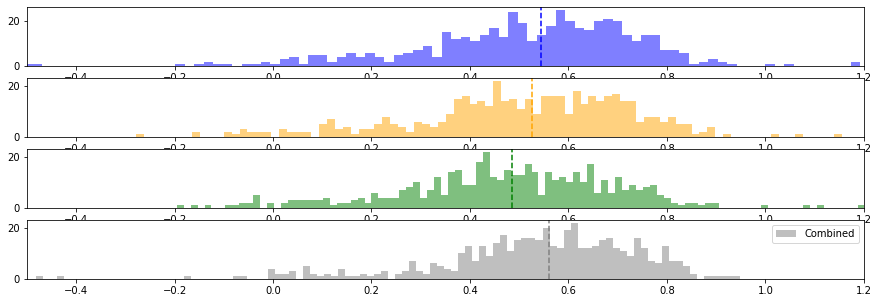

In [11]:
fig, axes = plt.subplots(4, 1, figsize=(15, 5))
medians = []
layer_ids = [1,2,3]
colors = ['blue', 'orange', 'green', 'red', 'gray']
layer_scores = []
for idx, layer_id in enumerate(layer_ids):
    axes[idx].hist(all_layer_dists[layer_id], color=colors[idx], alpha=0.5, bins=100, label=f'Layer {layer_id}')
    axes[idx].axvline(x=np.median(all_layer_dists[layer_id]), color=colors[idx], linestyle='--')
    axes[idx].set_xlim(-0.5, 1.2)
    medians.append(np.median(all_layer_dists[layer_id]))
    layer_scores.append(all_layer_dists[layer_id])

# idx=3
# median_scores = np.stack(layer_scores)
# median_scores = np.median(median_scores, axis=0)
# axes[idx].hist(median_scores, color=colors[idx], alpha=0.5, bins=100, label='median scores')
# axes[idx].axvline(x=np.median(median_scores), color=colors[idx], linestyle='--')
# axes[idx].set_xlim(-0.5, 1.2)

idx=-1
axes[idx].hist(combined_dist, color=colors[idx], alpha=0.5, bins=100, label='Combined')
axes[idx].axvline(x=np.median(combined_dist), color=colors[idx], linestyle='--')
axes[idx].set_xlim(-0.5, 1.2)
plt.legend()

### all layers combined

In [47]:
identifier = 'timit_trf_lags300_bw50_naplib_matched'
model_name = 'whisper_tiny'

area = 'all'
bin_width = 50
threshold = 0.3
normalized = True
mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
all_layer_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )

identifier = 'ucsf_timit_trf_lags300_bw50_plot_review_all_layers'
model_name = 'whisper_tiny'

area = 'all'
bin_width = 50
threshold = 0.3
normalized = True
mVocs = True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)

all_dists = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        threshold=threshold, normalized=normalized,
        mVocs=mVocs,
    )
combined_dist = all_dists[0]

Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...
Extracting column: normalized_test_cc
Filtering 'normalizer' using multiple of 0.300 with std dev ...


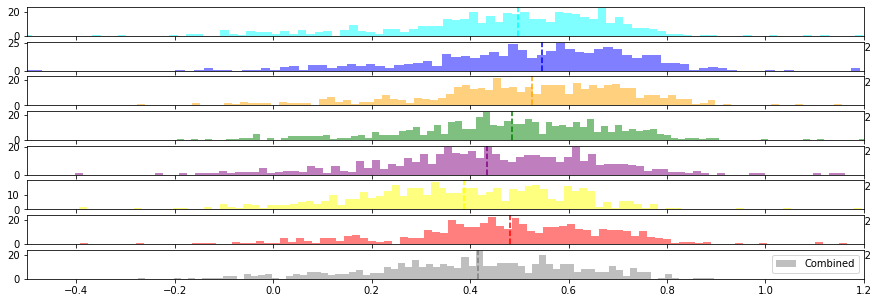

In [51]:
fig, axes = plt.subplots(8, 1, figsize=(15, 5))
medians = []
layer_ids = [0,1,2,3,4,5]
colors = ['cyan','blue', 'orange', 'green', 'purple', 'yellow','red', 'gray']
layer_scores = []
for idx, layer_id in enumerate(layer_ids):
    axes[idx].hist(all_layer_dists[layer_id], color=colors[idx], alpha=0.5, bins=100, label=f'Layer {layer_id}')
    axes[idx].axvline(x=np.median(all_layer_dists[layer_id]), color=colors[idx], linestyle='--')
    axes[idx].set_xlim(-0.5, 1.2)
    medians.append(np.median(all_layer_dists[layer_id]))
    layer_scores.append(all_layer_dists[layer_id])

idx=-2
median_scores = np.stack(layer_scores)
median_scores = np.median(median_scores, axis=0)
axes[idx].hist(median_scores, color=colors[idx], alpha=0.5, bins=100, label='mean scores')
axes[idx].axvline(x=np.median(median_scores), color=colors[idx], linestyle='--')
axes[idx].set_xlim(-0.5, 1.2)

idx=-1
axes[idx].hist(combined_dist, color=colors[idx], alpha=0.5, bins=100, label='Combined')
axes[idx].axvline(x=np.median(combined_dist), color=colors[idx], linestyle='--')
axes[idx].set_xlim(-0.5, 1.2)
plt.legend()

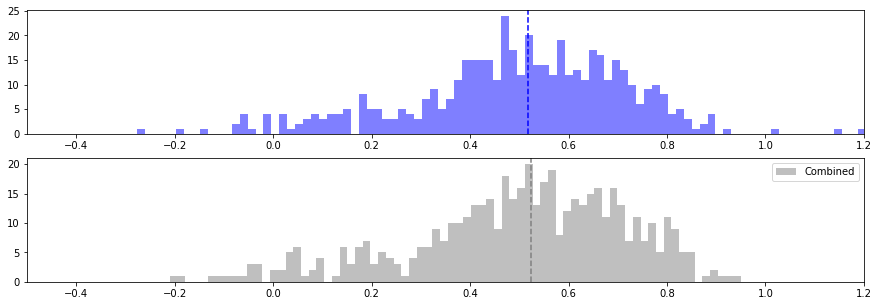

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
idx = 0
axes[idx].hist(mean_scores, color='blue', alpha=0.5, bins=100, label='mean scores')
axes[idx].axvline(x=np.median(mean_scores), color='blue', linestyle='--')
axes[idx].set_xlim(-0.5, 1.2)

idx = 1
axes[idx].hist(combined_dist, color='gray', alpha=0.5, bins=100, label='Combined')
axes[idx].axvline(x=np.median(combined_dist), color='gray', linestyle='--')
axes[idx].set_xlim(-0.5, 1.2)
plt.legend()

In [32]:
medians

[0.5452941238157727, 0.5252056807246963, 0.4852838804269922]

In [33]:
np.mean(medians)

0.5185945616558204

In [34]:
np.median(combined_dist)

0.5231495925149776